In [76]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
plt.rcParams["font.family"] = 'AppleGothic'  # 사용할 한글 폰트 설정

In [70]:
# mac 과 window일때의 한글폰트 설정
if platform.system() == 'Darwin' :
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

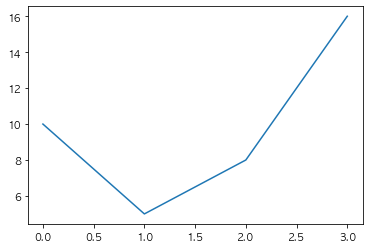

In [71]:
## matplotlib를 이용한 그래프의 시각화
# 라인그래프 (플로)
# y축의 데이터만 존재하는 경우
y_list = [10,5,8,16]
plt.plot(y_list)
plt.show()


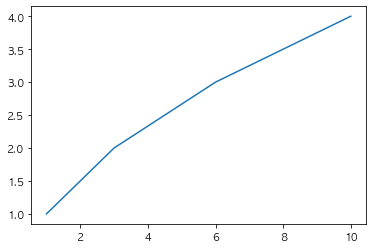

In [72]:
# x축의 데이터는 0부터 시작해서 1씩 증가하는 형태로 생성
x_list = [1,3,6,10]
y_list = [1,2,3,4]
plt.plot(x_list, y_list)
plt.show()

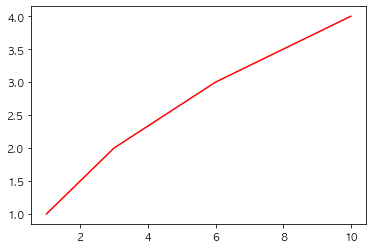

In [73]:
# 라인 그래프의 라인의 색상과 종류를 변경
plt.plot(x_list, y_list, 'r')
plt.show()



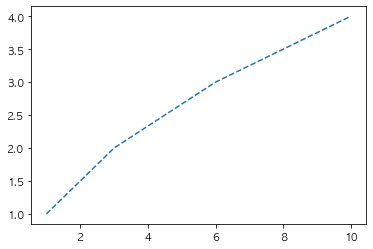

In [74]:
plt.plot(x_list, y_list, '--')
plt.show()

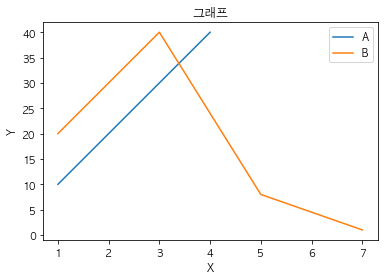

In [83]:
plt.plot([1,2,3,4],[10,20,30,40], label = 'A')
plt.plot([1,3,5,7],[20,40,8,1],label = 'B')
# x축에 라벨링
plt.xlabel('X')
# y축에 라벨링
plt.ylabel('Y')
# 그래프의 제목 표시
plt.title('그래프')
# 범례 추가
plt.legend()
plt.show()

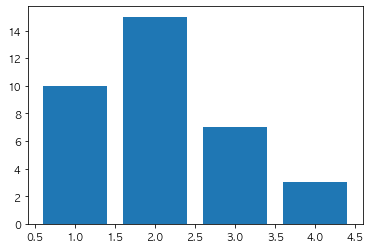

In [84]:
x = [1,2,3,4]
y = [10,15,7,3]
plt.bar(x,y)
plt.show()

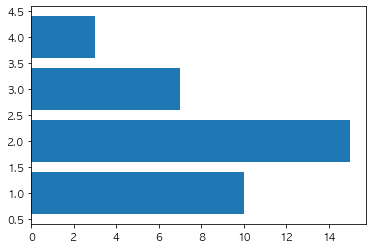

In [86]:
plt.barh(x,y)
plt.show()

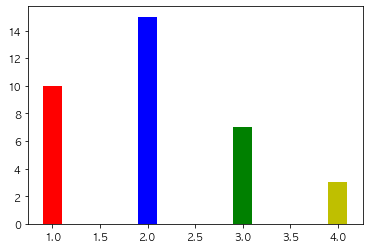

In [90]:
# 옵션추가(색상 너비변경)
plt.bar(x,y ,width = 0.2, color = ['r','b','g','y'])
plt.show()

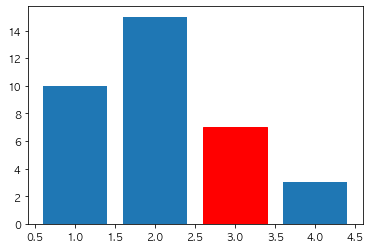

In [96]:
# 특정 막대의 색상을 변경
graph = plt.bar(x,y)
graph[2].set_color('r')
plt.show()

In [97]:
# 산점도 그래프
x = np.random.random(30)
y = np.random.random(30)

x

array([0.23430848, 0.0630671 , 0.76856846, 0.06201242, 0.89235091,
       0.13681978, 0.1425546 , 0.0307383 , 0.1073225 , 0.44682999,
       0.64956713, 0.14432364, 0.62847682, 0.3177702 , 0.90833719,
       0.01322178, 0.05049355, 0.47425627, 0.31363618, 0.81130219,
       0.03383509, 0.3158058 , 0.59665199, 0.68544866, 0.42674732,
       0.28651583, 0.09549291, 0.01593013, 0.88821639, 0.23235508])

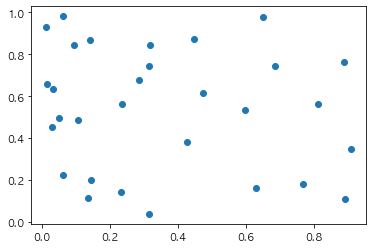

In [99]:
plt.scatter(x,y)
plt.show()

In [100]:
df = pd.read_csv('../csv/drinks.csv')

In [101]:
df.head(1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS


In [111]:
# 맥주소비량, 위스키소비량, 와인의 소비량, 알코도수의 
# 상관 관계 확인
# 상관 계수 : -1 ~ 1
    # -1 :  하나의 데이터가 오르면 나머지 하나의 데이터는 내려간다
    # 1 : 하나의 데이터가 오르면 나머지 하나의 데이터도 같이 올라간다
    # 0 : 두 개의 데이터가 무작위
# DataFrame 안에 있는 corr()함수 호출
corr = df[['beer_servings', 'spirit_servings','wine_servings',
    'total_litres_of_pure_alcohol']].corr('pearson').copy()

array([[1.        , 0.45881887, 0.52717169, 0.83583863],
       [0.45881887, 1.        , 0.19479705, 0.65496818],
       [0.52717169, 0.19479705, 1.        , 0.66759834],
       [0.83583863, 0.65496818, 0.66759834, 1.        ]])

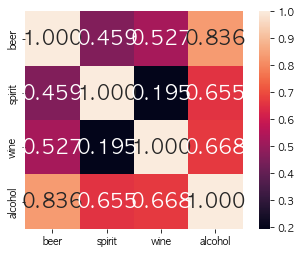

In [117]:
# seaborn 라이브러리를 이용하여 히트맵 시각화
cols = ['beer','spirit','wine','alcohol']
hm = sns.heatmap(
    corr.values,
    cbar = True, # 사이드바 표시
    annot = True, # 히트맵에 숫자를 표시
    square = True, # 정사각형 표기
    fmt = '0.3f', # 숫자의 소수점 자리수
    annot_kws = {'size': 20}, # 숫자의 크기
    xticklabels=cols,
    yticklabels=cols
)
plt.show()

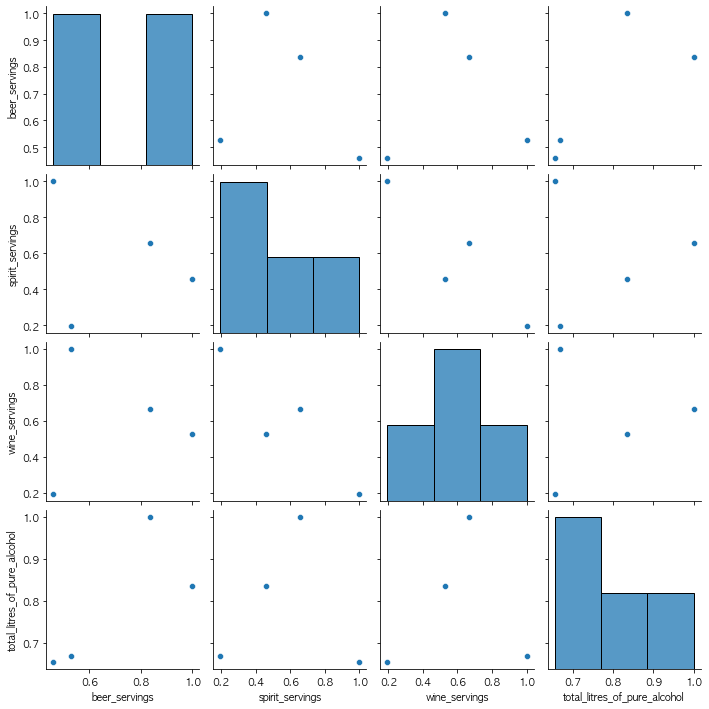

In [119]:
sns.pairplot(corr)

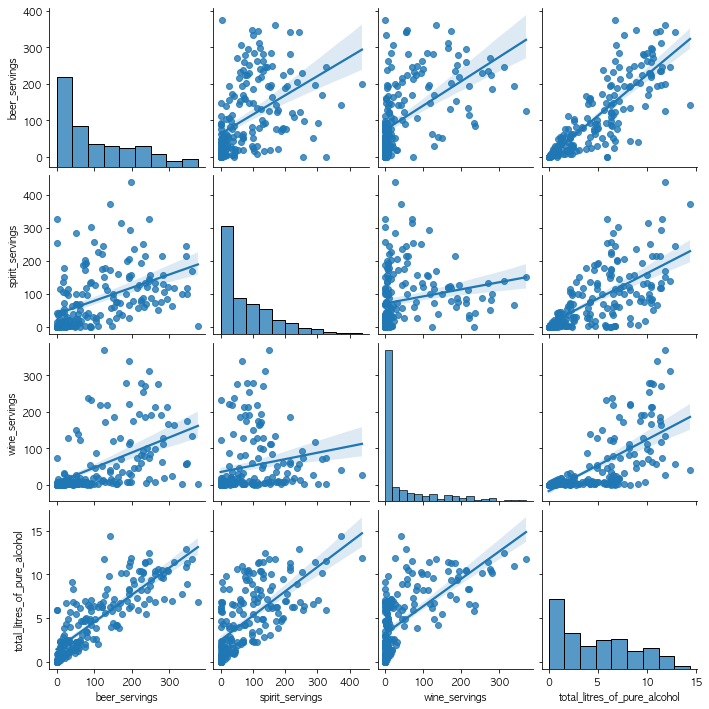

In [123]:
sns.pairplot(
    df.loc[:, 'beer_servings' : 'total_litres_of_pure_alcohol'],
    height = 2.5,
    kind = 'reg'

)
plt.show()